# Air Quality Prediction Model

## Project Overview
This comprehensive machine learning project focuses on predicting air quality levels in Jakarta, Indonesia, using historical air pollution data. The model analyzes multiple environmental factors to forecast the Air Quality Index (AQI) category, which is crucial for public health monitoring and environmental policy decisions.

### Dataset Context
The analysis is based on the **ISPU (Indeks Standar Pencemar Udara)** dataset from Jakarta DKI, which contains:
- **Temporal Coverage**: Historical air quality measurements from Jakarta monitoring stations
- **Pollutant Measurements**: PM10, PM2.5, SO2, CO, O3, NO2 concentrations
- **Air Quality Categories**: BAIK (Good), SEDANG (Moderate), TIDAK SEHAT (Unhealthy), SANGAT TIDAK SEHAT (Very Unhealthy)

### Key Objectives
1. **Exploratory Data Analysis**: Understand pollution patterns and relationships between different pollutants
2. **Feature Engineering**: Create temporal and statistical features to capture air quality trends
3. **Model Development**: Build and compare multiple machine learning algorithms for classification
4. **Performance Evaluation**: Comprehensive model assessment using multiple metrics including ROC-AUC analysis
5. **Model Saved**: Prepare models for real-world air quality prediction

---

## Library Imports

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Load

In [74]:
df = pd.read_csv("datasets/ispu_dki_all.csv")

### Dataset Structure Examination
Examining the first few rows to understand the structure of our dataset:

- `tanggal`: Date of measurement
- `stasiun`: Monitoring station identifier
- `pm10`, `pm25`: Particulate matter concentrations (μg/m³)
- `so2`: Sulfur dioxide concentration (μg/m³)
- `co`: Carbon monoxide concentration (μg/m³)
- `o3`: Ozone concentration (μg/m³)
- `no2`: Nitrogen dioxide concentration (μg/m³)
- `max`: Maximum pollutant value for the day
- `critical`: Critical pollutant that determined the day's AQI
- `categori`: Air quality category classification

In [75]:
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


### Data Types and Missing Values Analysis
Comprehensive examination of data types and null values

- **Data Types**: Ensure numerical columns are properly formatted
- **Missing Values**: Identify patterns of missing data across stations/time

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4466 non-null   float64
 3   pm25      723 non-null    float64
 4   so2       4607 non-null   float64
 5   co        4618 non-null   float64
 6   o3        4621 non-null   float64
 7   no2       4618 non-null   float64
 8   max       4626 non-null   float64
 9   critical  4625 non-null   object 
 10  categori  4626 non-null   object 
dtypes: float64(7), object(4)
memory usage: 397.7+ KB


### Descriptive Statistics Analysis

In [77]:
df.describe()

,pm10,pm25,so2,co,o3,no2,max
count,4466.000000,723.000000,4607.000000,4618.000000,4621.000000,4618.000000,4626.000000
mean,65.086879,94.374827,28.183851,30.263534,86.586670,18.120832,99.432123
std,19.243150,27.427553,13.822107,13.640344,50.295879,8.451605,43.284775
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,76.000000,18.000000,21.000000,51.000000,13.000000,70.000000
50%,64.000000,94.000000,27.000000,29.000000,78.000000,17.000000,91.000000
75%,75.000000,111.000000,34.000000,37.000000,110.000000,21.000000,118.000000
max,179.000000,287.000000,126.000000,134.000000,314.000000,134.000000,314.000000


# Exploratory Data Analysis (EDA)


Style for plot

In [78]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

Prepare a variable for numeric only

In [79]:
pollutants = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']

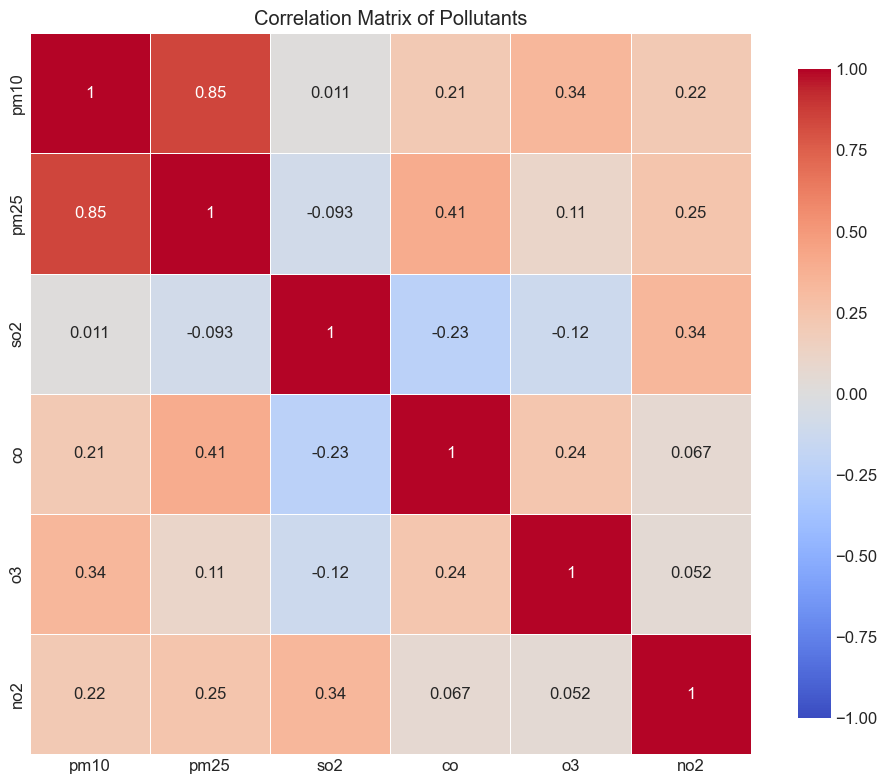

In [80]:
corr_matrix = df[pollutants].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .9})
plt.title('Correlation Matrix of Pollutants')
plt.tight_layout()
plt.show()

### Corelation Heatmap

The correlation heatmap reveals important relationships between different air pollutants in Jakarta. Understanding these correlations is crucial for:
- **Feature Selection**: Identifying redundant or highly correlated features
- **Multicollinearity Detection**: Preventing model instability from correlated predictors

#### Key Correlation Patterns Expected:

| Pollutant Pair | Expected Correlation | Scientific Rationale |
|----------------|---------------------|---------------------|
| **PM10 ↔ PM2.5** | **High Positive (0.85)** | PM2.5 is subset of PM10 |

So, we will remove PM2.5


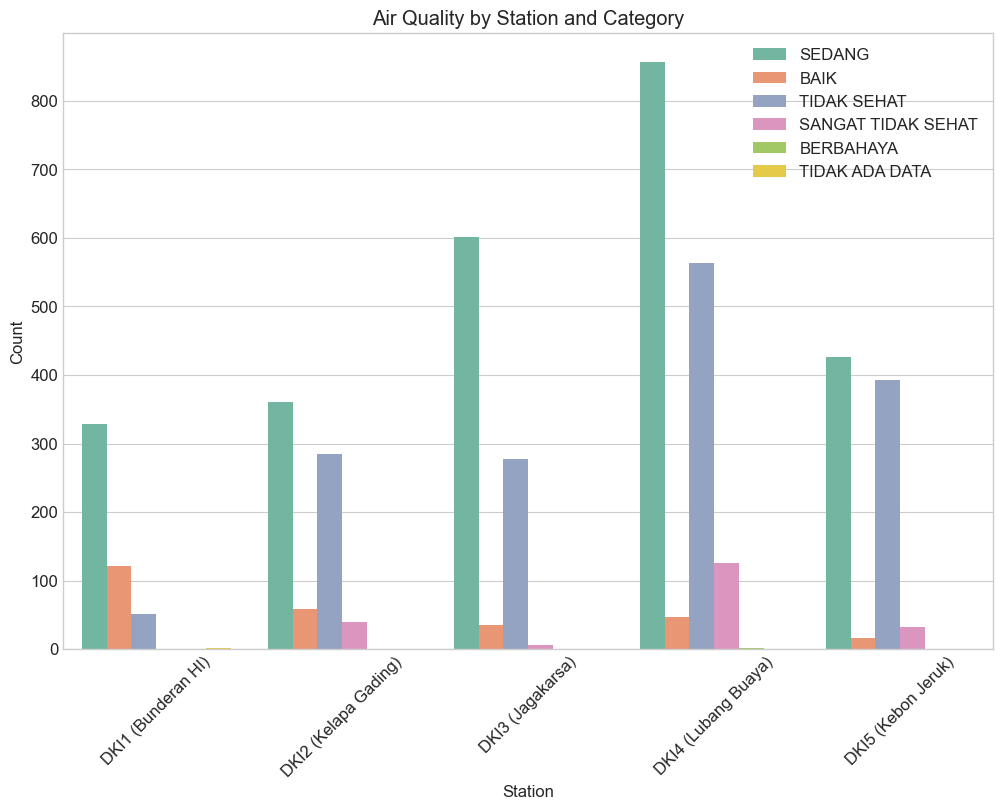

In [81]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='stasiun', hue='categori', palette='Set2')
plt.title("Air Quality by Station and Category")
plt.xlabel("Station")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

### Insights from the Air Quality by Station and Category Chart

1. "SEDANG" Category Dominates Across All Stations
    - Almost every station (DKI1 to DKI5) shows the highest count in the SEDANG air quality category.

    - This indicates that the air quality in Jakarta is frequently not ideal, but also not yet classified as dangerous.

2. Station DKI4 (Lubang Buaya) Records the Highest Observations
    - DKI4 has the highest number of readings in the SEDANG category, exceeding 800 instances.

    - It also shows a considerable number of TIDAK SEHAT and SANGAT TIDAK SEHAT readings, suggesting this area experiences frequent poor air quality and might require special attention.

3. "BAIK" Air Quality is Rare
    - The BAIK category appears only in small numbers at a few stations and is never dominant.

    - This suggests that truly clean air conditions are infrequent across the observed locations.

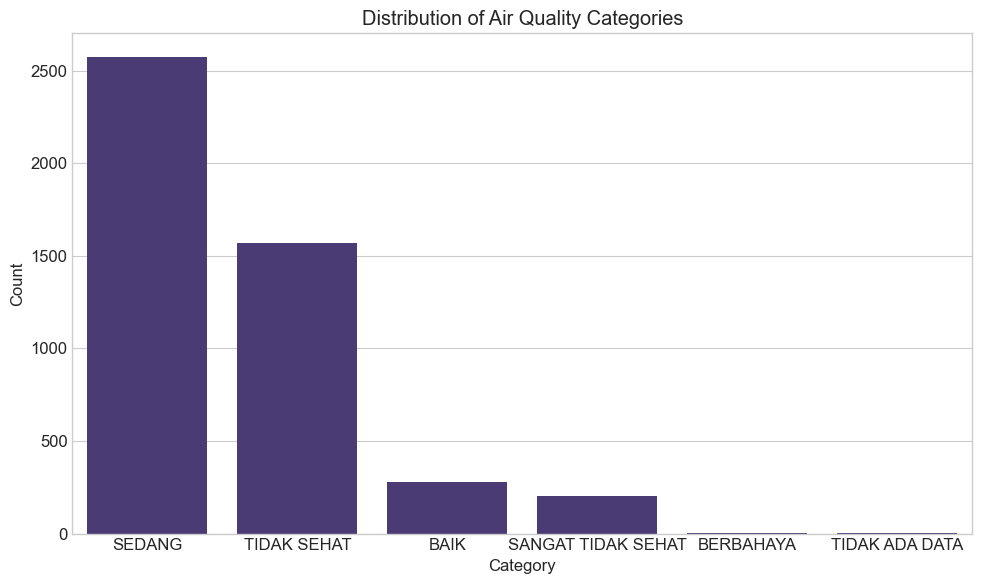

In [82]:
plt.figure(figsize=(10, 6))
category_counts = df['categori'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Air Quality Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Insights from the Distribution of Air Quality Categories
1. "SEDANG" is the Most Common Air Quality Condition
    - The SEDANG (MODERATE) category dominates the dataset, with over 2,500 observations.

    - This suggests that air quality in Jakarta is frequently not ideal, though not immediately harmful—this can still pose health risks for sensitive groups over time.

2. "TIDAK SEHAT" is the Second Most Frequent Category
    - The TIDAK SEHAT (UNHEALTHY) category has around 1,600 observations, indicating a significant portion of the time when air quality reaches levels that may affect the general population’s health, especially those with preexisting conditions.

3. "BAIK" and "SANGAT TIDAK SEHAT" are Relatively Rare
    - The BAIK (GOOD) and SANGAT TIDAK SEHAT (VERY UNHEALTHY) categories appear in small numbers compared to SEDANG and TIDAK SEHAT.

4. "BERBAHAYA" and "TIDAK ADA DATA" Categories are Nearly Nonexistent
    - Both BERBAHAYA (HAZARDOUS) and TIDAK ADA DATA (NO DATA) categories show almost zero occurrences.

C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_2744\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_2744\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_2744\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_2744\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_2744\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xt

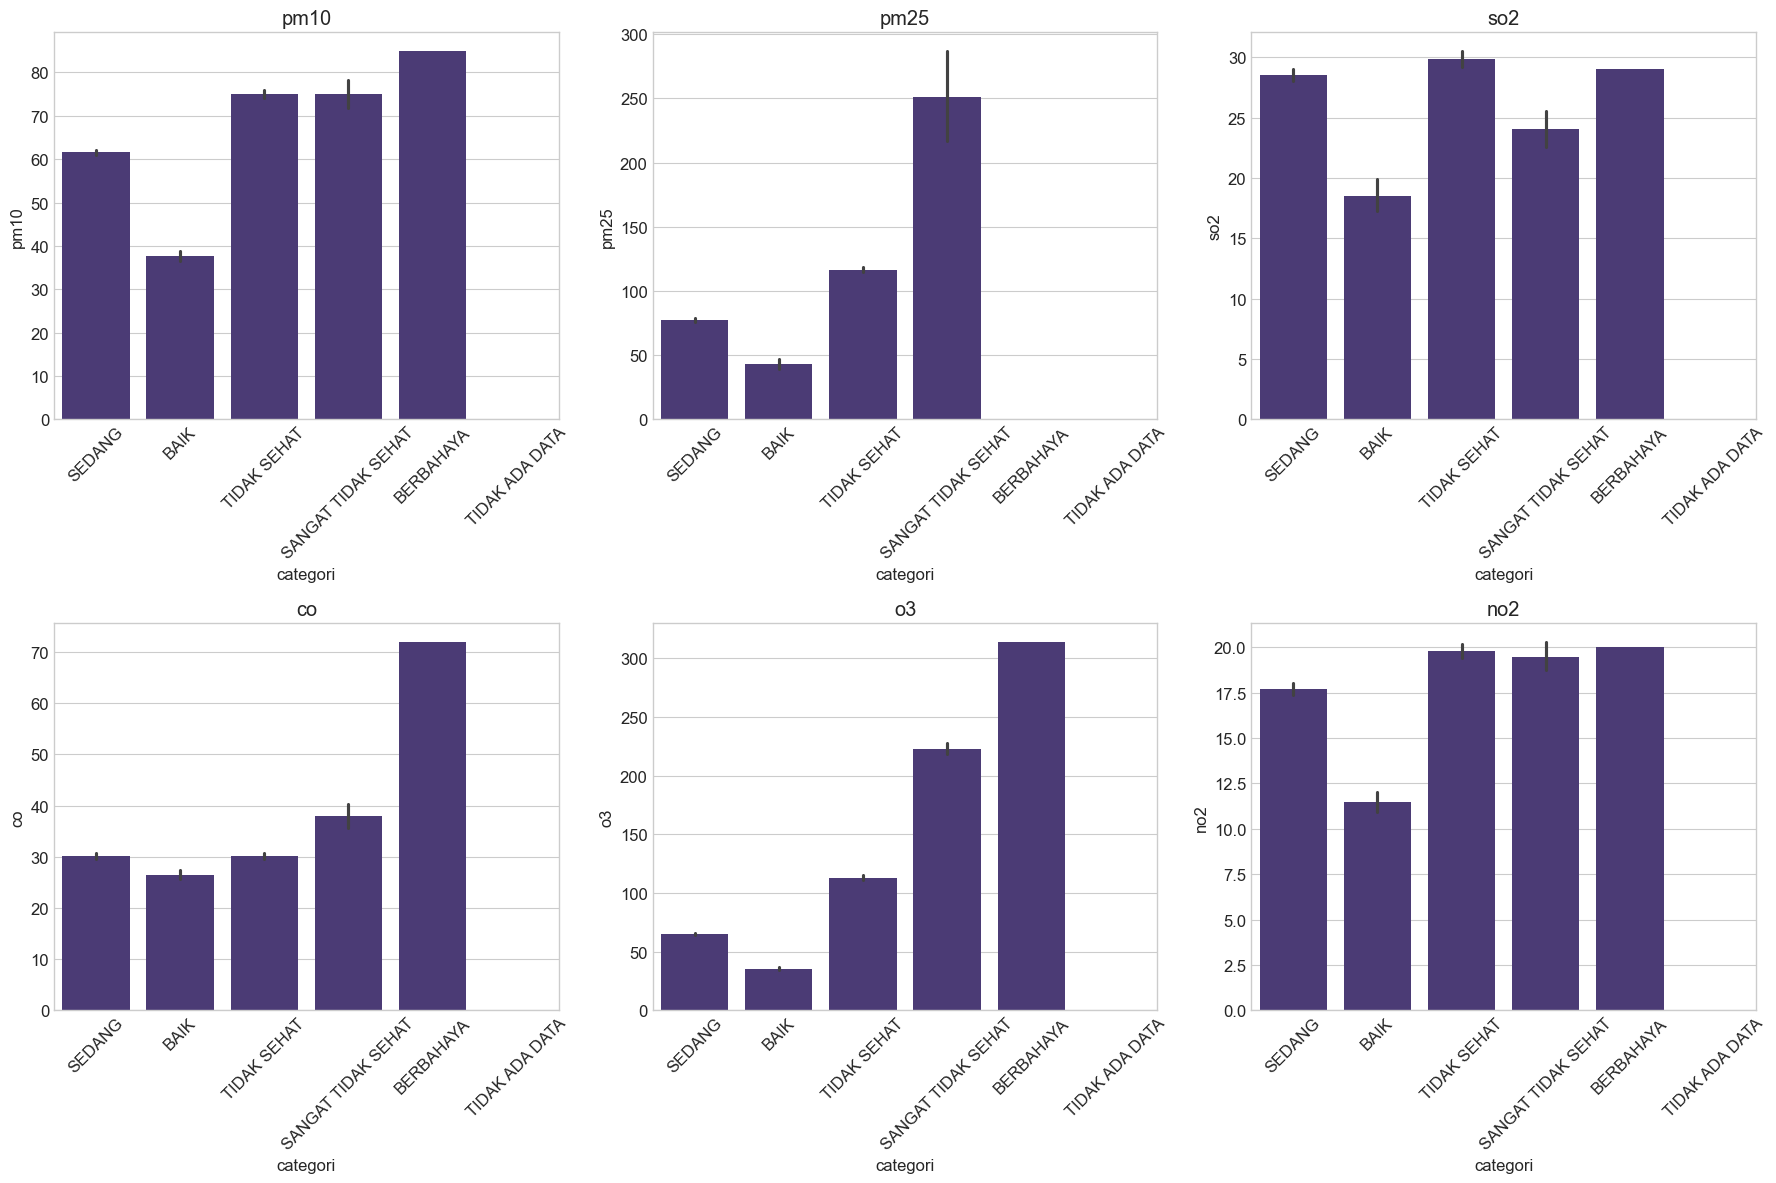

In [83]:
fig, axes = plt.subplots(2,3,figsize=(18,12))
axes = axes.flatten()

for i, col in enumerate(pollutants):
    sns.barplot(x='categori', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    
plt.tight_layout()
plt.show()

### General Insight
- PM2.5 and O3 show the most dramatic changes across categories, especially in severe pollution levels, indicating that they are strong indicators of unhealthy air.

- PM10, CO, and NO2 also contribute significantly, particularly as air quality worsens.

- SO2 shows moderate variation but remains relevant, especially in industrial zones.

- These patterns validate the use of these pollutants as features in machine learning models for air quality prediction, since they show clear correlation with air quality categories.

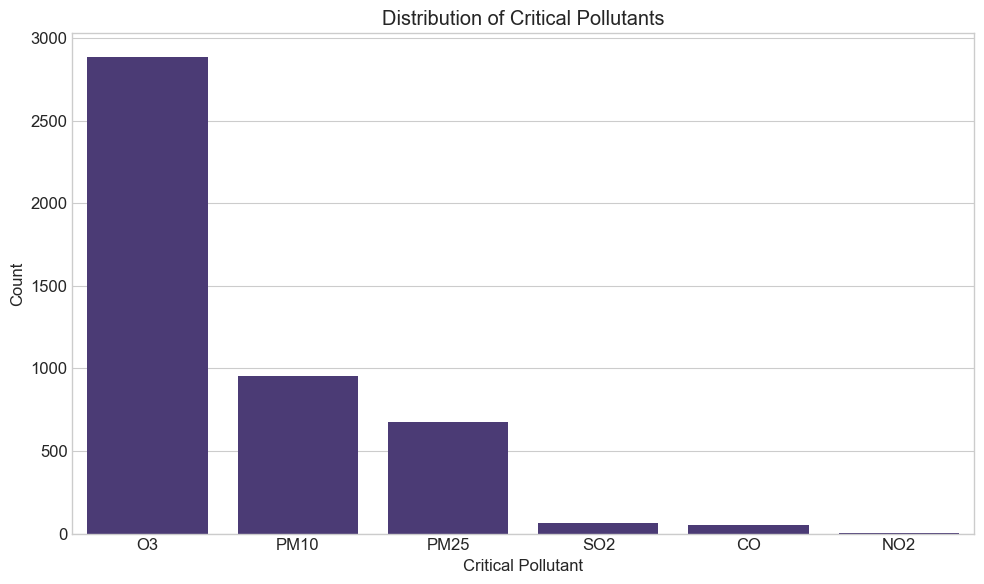

In [84]:
plt.figure(figsize=(10, 6))
critical_counts = df['critical'].value_counts()
sns.barplot(x=critical_counts.index, y=critical_counts.values)
plt.title('Distribution of Critical Pollutants')
plt.xlabel('Critical Pollutant')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Key Observations
- O₃ (Ozone) is by far the most dominant critical pollutant, appearing in nearly 3,000 records.

    This suggests ozone is the leading driver of poor air quality in the dataset.

- PM10 and PM2.5 are the second and third most frequent critical pollutants.

- SO₂ (Sulfur Dioxide) and CO (Carbon Monoxide) appear far less frequently.

    Their lower frequency suggests they are less commonly the dominant pollutant, though they still play a role in specific pollution events or industrial areas.

- NO₂ (Nitrogen Dioxide) is the least frequent as a critical pollutant.


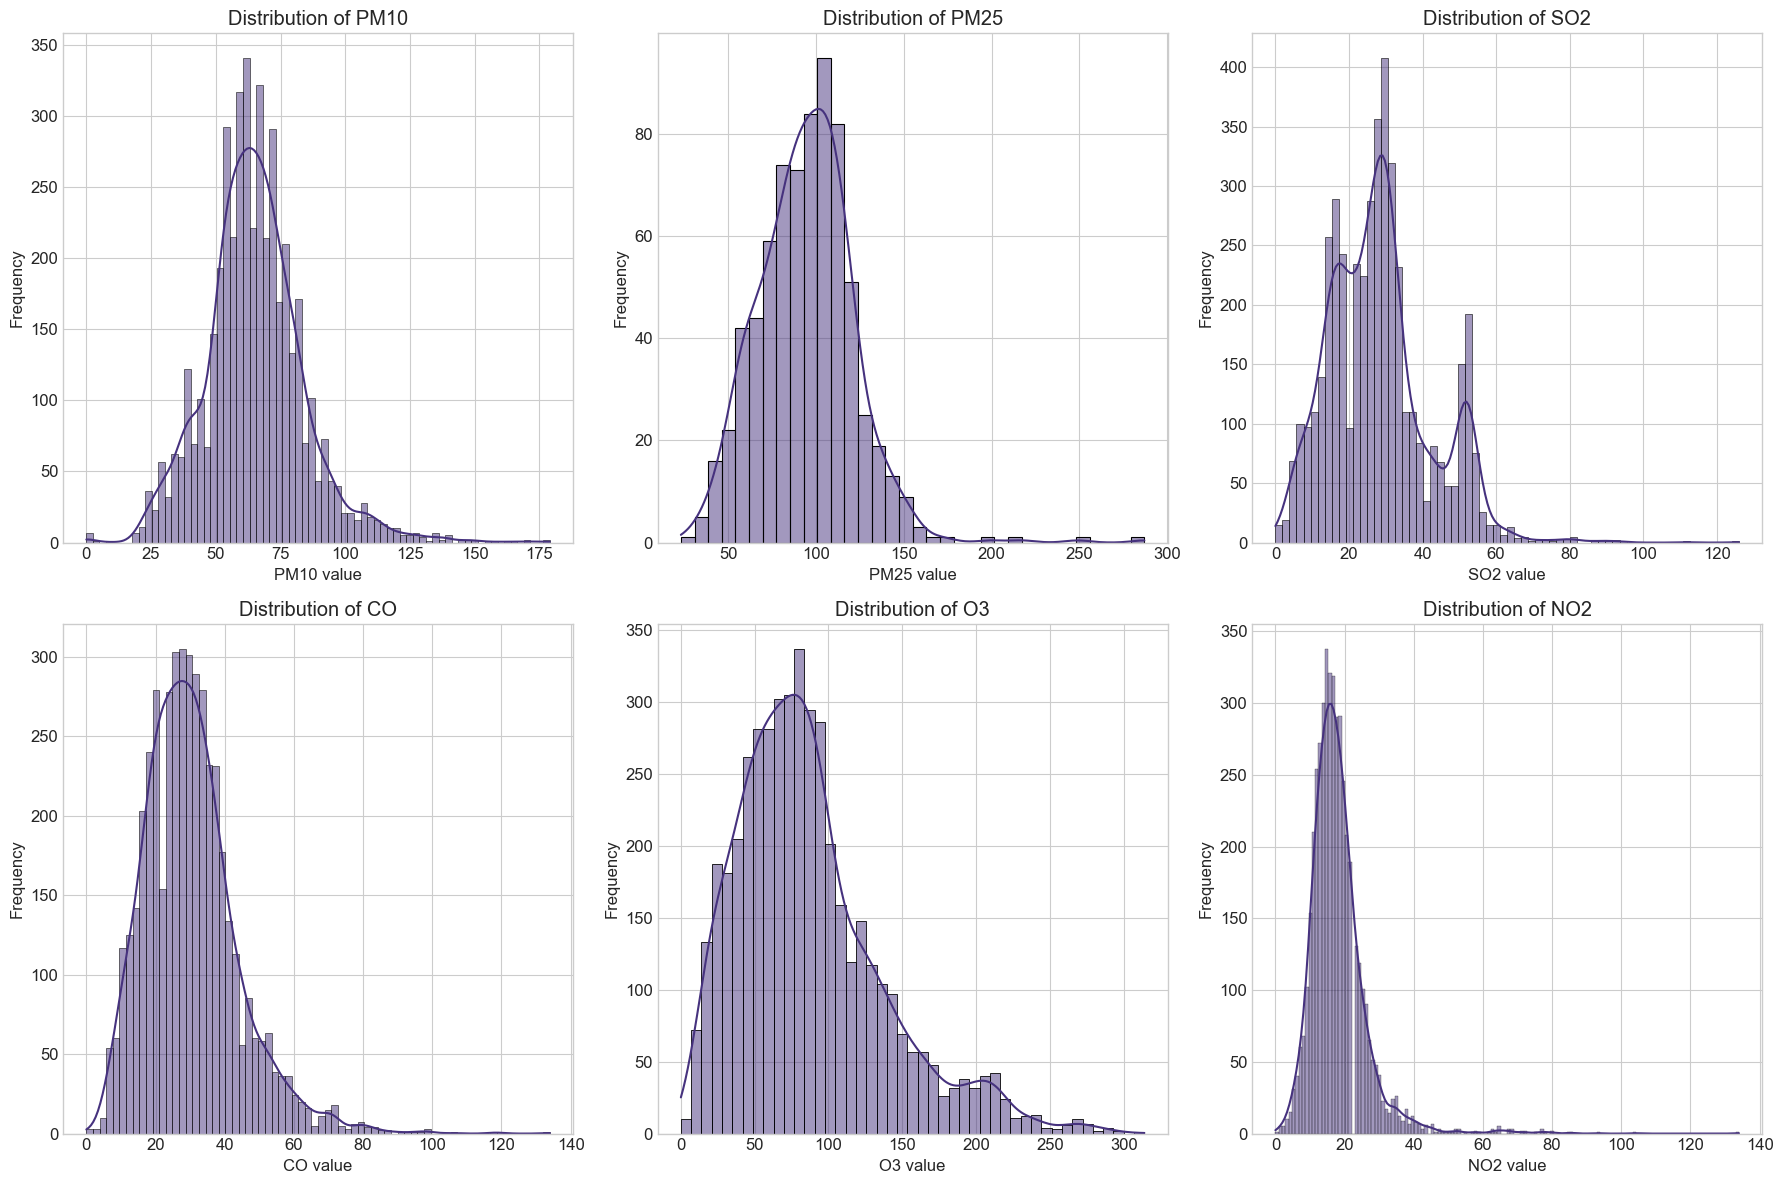

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(pollutants):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col.upper()}')
    axes[i].set_xlabel(f'{col.upper()} value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### Insight
Most pollutants exhibit right-skewed distributions, meaning high pollution episodes are less frequent

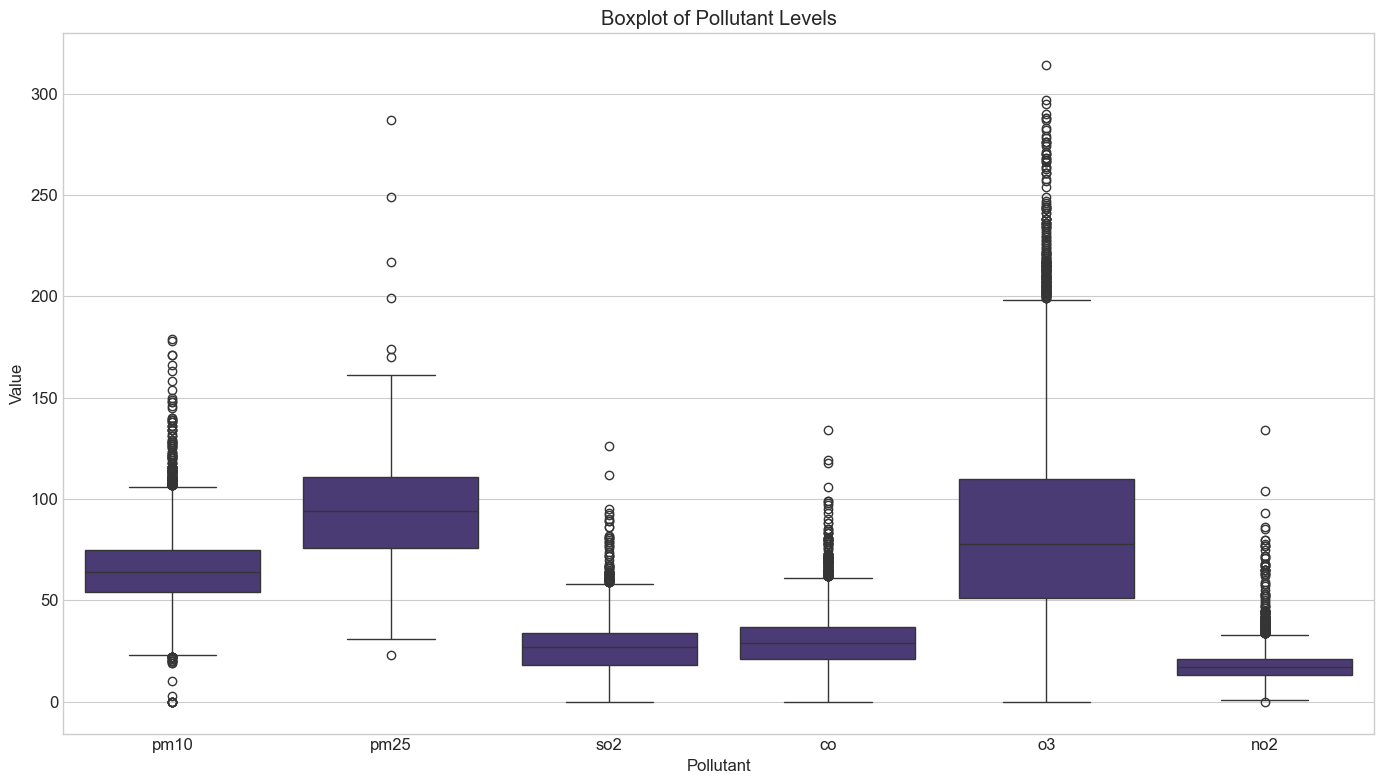

In [ ]:
plt.figure(figsize=(14, 8))
melted_df = pd.melt(df[pollutants], var_name='Pollutant', value_name='Value')
sns.boxplot(x='Pollutant', y='Value', data=melted_df)
plt.title('Boxplot of Pollutant Levels')
plt.tight_layout()
plt.show()

# 

### Details
- PM10

    Median around 60 µg/m³.

    Moderate IQR (~50 to 90), but many high outliers up to ~150+.

- PM2.5

    Median around 90 µg/m³, higher than PM10.

    Wider IQR (~70 to 110) and extreme outliers up to >300 µg/m³.

- SO₂ and CO

    Both show tight IQRs, indicating relatively stable pollutant levels.

    Median values ~25–30.

- O₃ (Ozone)

    Median around 80 ppb, with a very wide IQR.

    Significant outlier presence up to ~300 ppb.

- NO₂

    Most values are clustered below 30 ppb.

### Summary
PM2.5 and O₃ exhibit the widest variability and most extreme outliers. For O₃ outlier that presence up to 300 ppb is accepeted. 

SO₂, CO, and NO₂ are generally more stable


In [15]:
# PRE PROCESSING

# Pre-Processing

### Data Duplication

Check data duplication

In [16]:
df.duplicated().sum()

0

Check missing values

In [17]:
missing_values = df.isnull().sum()
missing_percent = 100 * missing_values / len(df)
missing_df = pd.DataFrame({'Missing Values': missing_values, 
                            'Percentage': missing_percent})
missing_df

,Missing Values,Percentage
tanggal,0,0.000000
stasiun,0,0.000000
pm10,160,3.458712
pm25,3903,84.370947
so2,19,0.410722
co,8,0.172936
o3,5,0.108085
no2,8,0.172936
max,0,0.000000
critical,1,0.021617


Fill Missing Values with median since only <= 160 data were missing.  

In [18]:
df = df.fillna(df.median(numeric_only=True))

Fill Missing Values categorical with mode

In [19]:
for column in df.columns:
    mode = df[column].mode()
    if not mode.empty:
        df[column] = df[column].fillna(mode[0])

In [20]:
missing_values = df.isnull().sum()
missing_percent = 100 * missing_values / len(df)
missing_df = pd.DataFrame({'Missing Values': missing_values, 
                            'Percentage': missing_percent})
missing_df

,Missing Values,Percentage
tanggal,0,0.0
stasiun,0,0.0
pm10,0,0.0
pm25,0,0.0
so2,0,0.0
co,0,0.0
o3,0,0.0
no2,0,0.0
max,0,0.0
critical,0,0.0


Due to the limited number of records for the 'BERBAHAYA' and 'TIDAK ADA DATA' categories, we decided to remove them from the dataset

In [21]:
df = df[df['categori'] != 'BERBAHAYA']
df = df[df['categori'] != 'TIDAK ADA DATA']


Pre-Processing for Modelling Date with Sliding Window Method

In [22]:
df_for_date = df

In [23]:
x, y = [], []

features_name = []

for i in range(7, len(df_for_date)):
    sliding_window_df = df_for_date.iloc[i - 7:i]

    features = []

    for col in ['pm10', 'so2', 'co', 'o3', 'no2']:
        series = sliding_window_df[col]
        stats = {
            f"mean_{col}": series.mean(),
            f'std_{col}': series.std(),
            f'min_{col}': series.min(),
            f'max_{col}': series.max(),
            f'median_{col}': series.median(),
            f'range_{col}': series.max() - series.min(),
            f'last_{col}': series.iloc[-1],
            f'slope_{col}': np.polyfit(range(len(series)), series, 1)[0],
        }

        if i == 7: 
            features_name.extend(stats.keys()) 

        features.extend(stats.values())
    
    label = df_for_date.iloc[i]['categori']
    x.append(features)
    y.append(label)

x = pd.DataFrame(x, columns=features_name)
y = pd.Series(y)


## 5.9 Advanced Sliding Window Feature Engineering

Sophisticated time-series feature extraction using a 7-day sliding window to capture temporal patterns and trends in air quality data:

#### Statistical Feature Definitions:

| Feature | Formula |
|---------|---------|
| **mean_pollutant** | Σ(values)/n |
| **std_pollutant** | √(Σ(x-μ)²/n) |
| **min_pollutant** | min(values) |
| **max_pollutant** | max(values) |
| **median_pollutant** | 50th percentile |
| **range_pollutant** | max - min |
| **last_pollutant** | Most recent value |
| **slope_pollutant** | Linear trend coefficient |


#### Model Implications:
- **Feature Dimensionality**: 8 features × 5 pollutants = 40 engineered features

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mean_pm10    4617 non-null   float64
 1   std_pm10     4617 non-null   float64
 2   min_pm10     4617 non-null   float64
 3   max_pm10     4617 non-null   float64
 4   median_pm10  4617 non-null   float64
 5   range_pm10   4617 non-null   float64
 6   last_pm10    4617 non-null   float64
 7   slope_pm10   4617 non-null   float64
 8   mean_so2     4617 non-null   float64
 9   std_so2      4617 non-null   float64
 10  min_so2      4617 non-null   float64
 11  max_so2      4617 non-null   float64
 12  median_so2   4617 non-null   float64
 13  range_so2    4617 non-null   float64
 14  last_so2     4617 non-null   float64
 15  slope_so2    4617 non-null   float64
 16  mean_co      4617 non-null   float64
 17  std_co       4617 non-null   float64
 18  min_co       4617 non-null   float64
 19  max_co

In [25]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4617 entries, 0 to 4616
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
4617 non-null   object
dtypes: object(1)
memory usage: 36.2+ KB


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4624 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4624 non-null   object 
 1   stasiun   4624 non-null   object 
 2   pm10      4624 non-null   float64
 3   pm25      4624 non-null   float64
 4   so2       4624 non-null   float64
 5   co        4624 non-null   float64
 6   o3        4624 non-null   float64
 7   no2       4624 non-null   float64
 8   max       4624 non-null   float64
 9   critical  4624 non-null   object 
 10  categori  4624 non-null   object 
dtypes: float64(7), object(4)
memory usage: 433.5+ KB


Removing unnecessary columns for modeling:
- **tanggal**: Date column
- **stasiun**: Station info
- **pm25**

In [27]:
df.drop(columns=['tanggal', 'stasiun', 'pm25'], inplace=True)

### One-Hot Encoding
Converting categorical 'critical' pollutant variable into binary features:

In [28]:
df = pd.get_dummies(df, columns=['critical'])

### Label Encoding
Converting categorical target variable to numerical format for machine learning:

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['categori'] = label_encoder.fit_transform(df['categori'])
y = label_encoder.fit_transform(y)

In [30]:
print(pd.Series(y).value_counts())

2    2573
3    1568
0     274
1     202
Name: count, dtype: int64


# MODELLING

Import Library

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from itertools import cycle
import pickle

C:\Users\Asus TUF\AppData\Roaming\Python\Python312\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Define Function for spliting data (80-10-10) and for CV

In [32]:
def split_data(X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=42):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, random_state=random_state, stratify=y, shuffle=True)
    relative_val_size = val_size / (val_size + test_size)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=relative_val_size, random_state=random_state, stratify=y_temp, shuffle=True)
    return X_train, X_val, X_test, y_train, y_val, y_test

def perform_cross_validation(model, X, y, cv=5, scoring='f1_weighted'):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    print(f"Cross-validation scores ({cv}-fold): {cv_scores}")
    print(f"Mean CV score: {cv_scores.mean():.4f}, Std: {cv_scores.std():.4f}")

## Modelling Date

In [33]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(x, y)

In [34]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

with open("models/weather_date_scaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)


In [35]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softmax', num_class=4, random_state=42),
    "LightBGM": LGBMClassifier(objective='multiclass',num_class=4,random_state=42),
}

### Multi-Algorithm Model Selection Strategy

Comprehensive ensemble of state-of-the-art machine learning algorithms optimized for multi-class air quality prediction:

#### Algorithm:

| Algorithm | Category | Strengths | Air Quality Advantages |
|-----------|----------|-----------|----------------------|
| **Random Forest** | Ensemble (Bagging) | Robust, interpretable, handles mixed data | Feature importance, outlier resistance |
| **XGBoost** | Ensemble (Boosting) | Superior performance, handles imbalance | Advanced regularization, missing value handling |
| **LightGBM** | Ensemble (Boosting) | Fast, memory efficient | Large dataset scalability, categorical features |


### Class Imbalance Analysis
Checking the distribution of target classes before applying SMOTE:

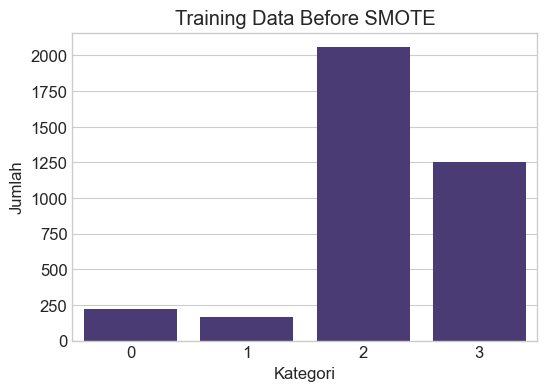

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Training Data Before SMOTE')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

### After SMOTE Class Distribution
Verifying that classes are now balanced after SMOTE application:

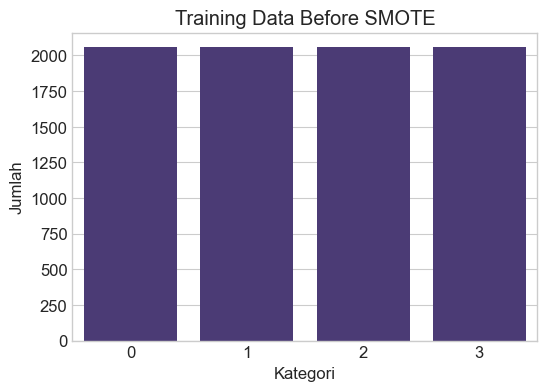

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Training Data Before SMOTE')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

### CV

In [40]:
for name, model in models.items():
    print(name)
    perform_cross_validation(model,X_train,y_train)
    print("==================================")

Random Forest
Cross-validation scores (5-fold): [0.85229009 0.84262686 0.85558537 0.88548745 0.88390814]
Mean CV score: 0.8640, Std: 0.0175
XGBoost
Cross-validation scores (5-fold): [0.82928165 0.83360736 0.84480492 0.88958087 0.88315007]
Mean CV score: 0.8561, Std: 0.0253
LightBGM
Cross-validation scores (5-fold): [0.81951301 0.83507048 0.85299284 0.90315234 0.88239764]
Mean CV score: 0.8586, Std: 0.0305


### Model Performance Comparison (5-Fold Cross-Validation)

| Model         | Mean CV Score | Std Deviation | Insights                                              |
|---------------|----------------|----------------|--------------------------------------------------------|
| Random Forest | **0.8640**     | **0.0175**     | Highest accuracy and most stable (lowest variance)     |
| LightGBM      | 0.8586         | 0.0305         | Higher Variance                                        |
| XGBoost       | 0.8561         | 0.0253         | Good performance, moderate variance                    |


In [41]:
val_scores = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]
    acc = accuracy_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred, average='weighted')
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    prec = precision_score(y_val, y_val_pred, average='weighted')

    val_scores[name] = [acc, rec, f1, prec]
    
    print(f"Validation Accuracy ({name}): {acc:.4f}")
    print(f"Validation Recall ({name}): {rec:.4f}")
    print(f"Validation F1 ({name}): {f1:.4f}")
    print(f"Validation Precision ({name}): {prec:.4f}")
    print(classification_report(y_val, y_val_pred))



Training Random Forest...
Validation Accuracy (Random Forest): 0.6667
Validation Recall (Random Forest): 0.6667
Validation F1 (Random Forest): 0.6669
Validation Precision (Random Forest): 0.6689
              precision    recall  f1-score   support

           0       0.47      0.59      0.52        27
           1       0.52      0.60      0.56        20
           2       0.73      0.74      0.74       258
           3       0.61      0.57      0.59       157

    accuracy                           0.67       462
   macro avg       0.59      0.62      0.60       462
weighted avg       0.67      0.67      0.67       462


Training XGBoost...
Validation Accuracy (XGBoost): 0.6818
Validation Recall (XGBoost): 0.6818
Validation F1 (XGBoost): 0.6827
Validation Precision (XGBoost): 0.6847
              precision    recall  f1-score   support

           0       0.47      0.56      0.51        27
           1       0.54      0.65      0.59        20
           2       0.75      0.74      0

In [42]:
metric_name = ["Accuracy", "Recall", "F1_Score", "Precision"]

df_val_score = pd.DataFrame(val_scores, index=metric_name).T

print(df_val_score)

               Accuracy    Recall  F1_Score  Precision
Random Forest  0.666667  0.666667  0.666939   0.668911
XGBoost        0.681818  0.681818  0.682691   0.684713
LightBGM       0.692641  0.692641  0.692440   0.693205


LightBGM get best performance between others models

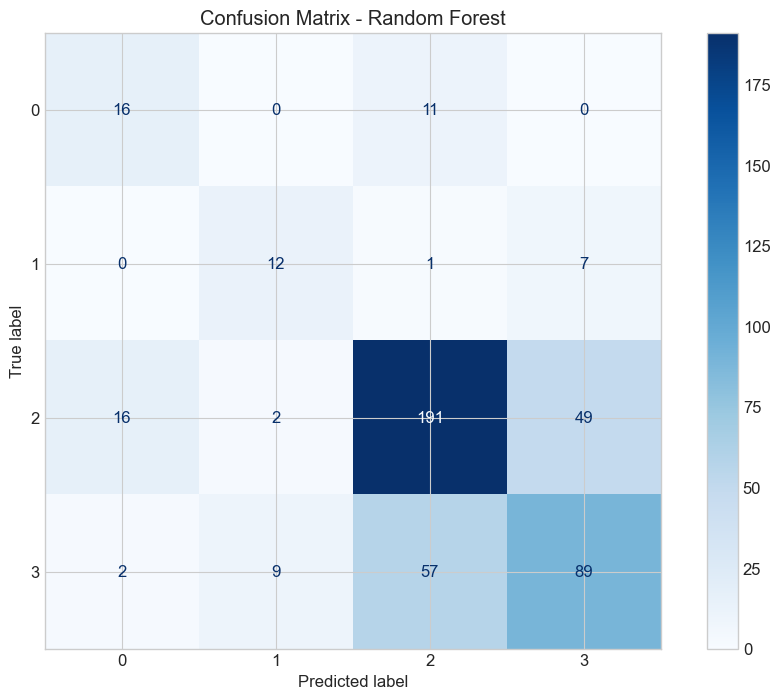

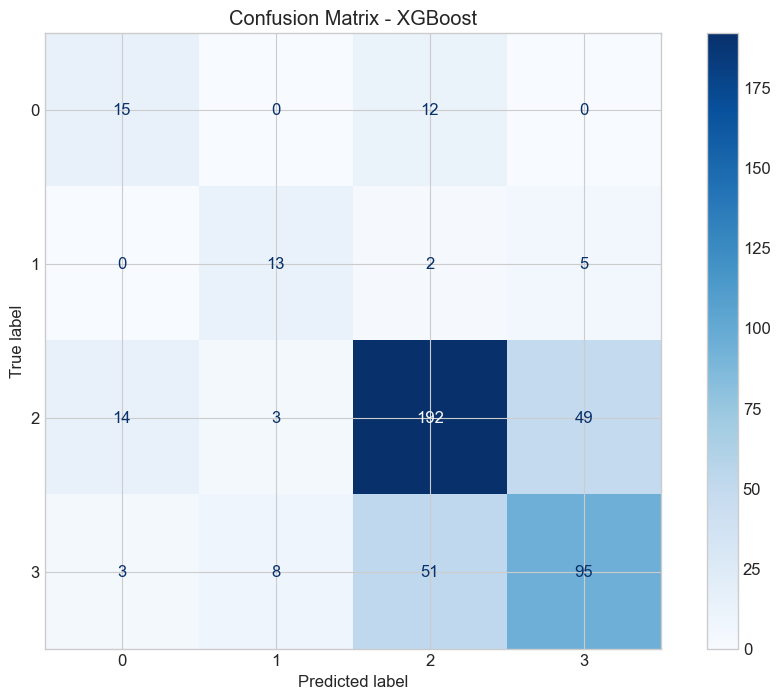

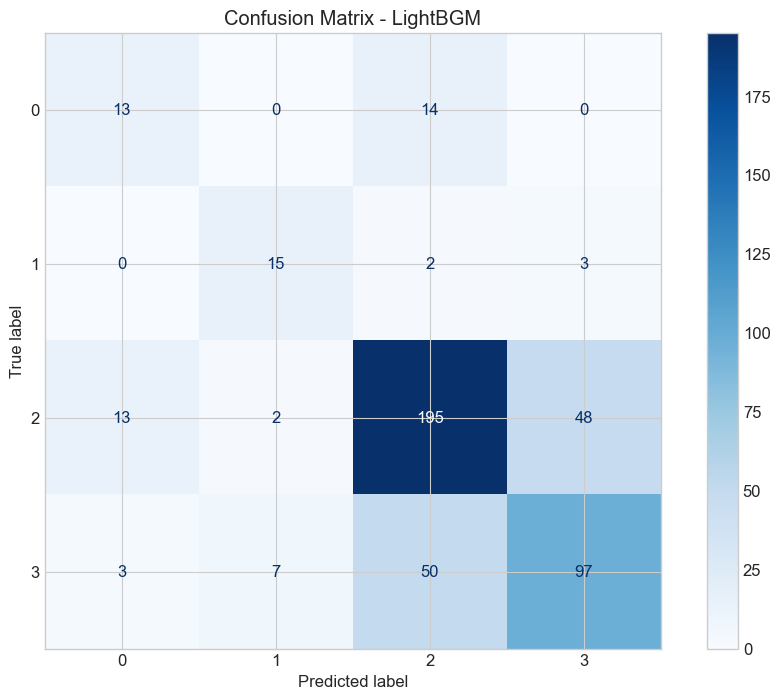

In [43]:
for name, model in models.items():
    y_val_pred = model.predict(X_val)

    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


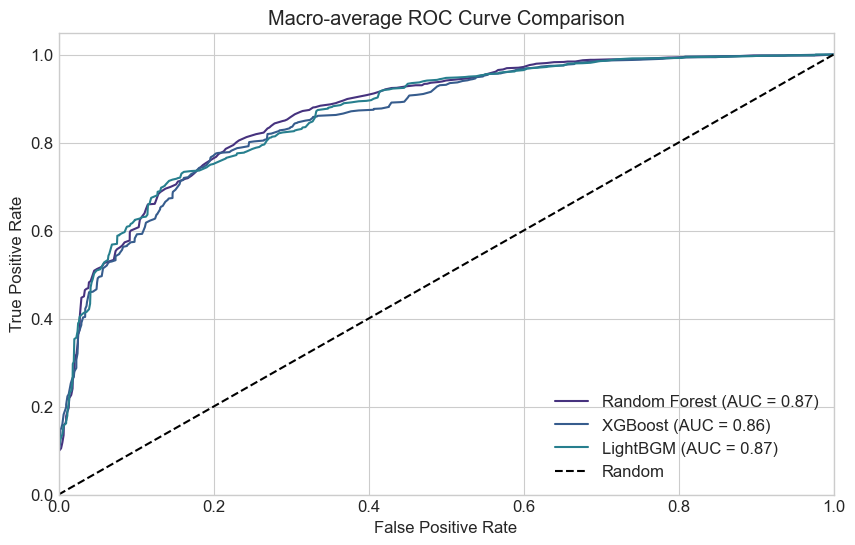

In [44]:

y_train = pd.Series(y_train)
classes = sorted(y_train.unique()) 
y_val_bin = label_binarize(y_val, classes=classes)
n_classes = len(classes)

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_score = model.predict_proba(X_val)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, label=f"{name} (AUC = {macro_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-average ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Based on Evaluation, LightGBM get a good performance rather than others. So we will tuning LightGBM to find a better performance

In [45]:
# param_grid_lgb = {
#     'n_estimators': [100, 200],
#     'max_depth': [-1, 10],
#     'learning_rate': [0.01, 0.1],
#     'num_leaves': [30, 100],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'reg_alpha': [0.1],
#     'reg_lambda': [0],
#     'min_child_samples': [20, 40],
#     'min_split_gain': [0.0, 0.1]
# }

# lgb = LGBMClassifier(objective='multiclass',num_class=4,random_state=42)

# grid_lgb = GridSearchCV(lgb, param_grid_lgb, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted')
# grid_lgb.fit(X_train, y_train)

# print(f"Best LightGBM params: {grid_lgb.best_params_}")

In [46]:
# models_tuned = {
#     'LightGBM Tuned': grid_lgb.best_estimator_
# }

# val_scores = {}

# for name, model in models_tuned.items():
#     print(f"\nEvaluating {name}...")
#     y_val_pred = model.predict(X_val)
#     y_val_proba = model.predict_proba(X_val)[:, 1]
#     acc = accuracy_score(y_val, y_val_pred)
#     rec = recall_score(y_val, y_val_pred, average='weighted')
#     f1 = f1_score(y_val, y_val_pred, average='weighted')
#     prec = precision_score(y_val, y_val_pred, average='weighted')

#     val_scores[name] = [acc, rec, f1, prec]
    
#     print(f"Validation Accuracy ({name}): {acc:.4f}")
#     print(f"Validation Recall ({name}): {rec:.4f}")
#     print(f"Validation F1 ({name}): {f1:.4f}")
#     print(f"Validation Precision ({name}): {prec:.4f}")
#     print(classification_report(y_val, y_val_pred))

In [47]:
# print("TUNED")
# metric_name = ["Accuracy", "Recall", "F1_Score", "Precision"]

# df_val_score = pd.DataFrame(val_scores, index=metric_name).T

# print(df_val_score)

In [48]:
# for name, model in models_tuned.items():
#     y_val_pred = model.predict(X_val)

#     cm = confusion_matrix(y_val, y_val_pred)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#     disp.plot(cmap=plt.cm.Blues)
#     plt.title(f"Confusion Matrix TUNED - {name}")
#     plt.show()

In [49]:

# y_train = pd.Series(y_train)
# classes = sorted(y_train.unique()) 
# y_val_bin = label_binarize(y_val, classes=classes)
# n_classes = len(classes)

# plt.figure(figsize=(10, 6))

# for name, model in models_tuned.items():
#     y_score = model.predict_proba(X_val)

#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
    
#     for i in range(n_classes):
#         fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
#     mean_tpr = np.zeros_like(all_fpr)

#     for i in range(n_classes):
#         mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

#     mean_tpr /= n_classes

#     macro_auc = auc(all_fpr, mean_tpr)
#     plt.plot(all_fpr, mean_tpr, label=f"{name} (AUC = {macro_auc:.2f})")

# # Plot settings
# plt.plot([0, 1], [0, 1], "k--", label="Random")
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Macro-average ROC Curve TUNED")
# plt.legend(loc="lower right")
# plt.grid(True)
# plt.show()


LightGBM

### TUNED

Accuracy ->  0.681818

Recall  -> 0.681818 

F1_Score  -> 0.678353 

Precision -> 0.676948

AUC -> 0.85

### Before TUNED

Accuracy -> 0.692641

Recall -> 0.692641

F1_Score -> 0.692440

Precision -> 0.693205

AUC -> 0.87





Performance on LightGBM Before TUNED is the best. So we will use that model for our testing set. 

### Evaluation on Testing Set

=== TEST SET METRICS ===
Accuracy: 0.6558
F1 Score: 0.6529
Recall: 0.6558
Precision: 0.6518
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        28
           1       0.43      0.45      0.44        20
           2       0.72      0.75      0.74       257
           3       0.59      0.58      0.59       157

    accuracy                           0.66       462
   macro avg       0.56      0.53      0.54       462
weighted avg       0.65      0.66      0.65       462



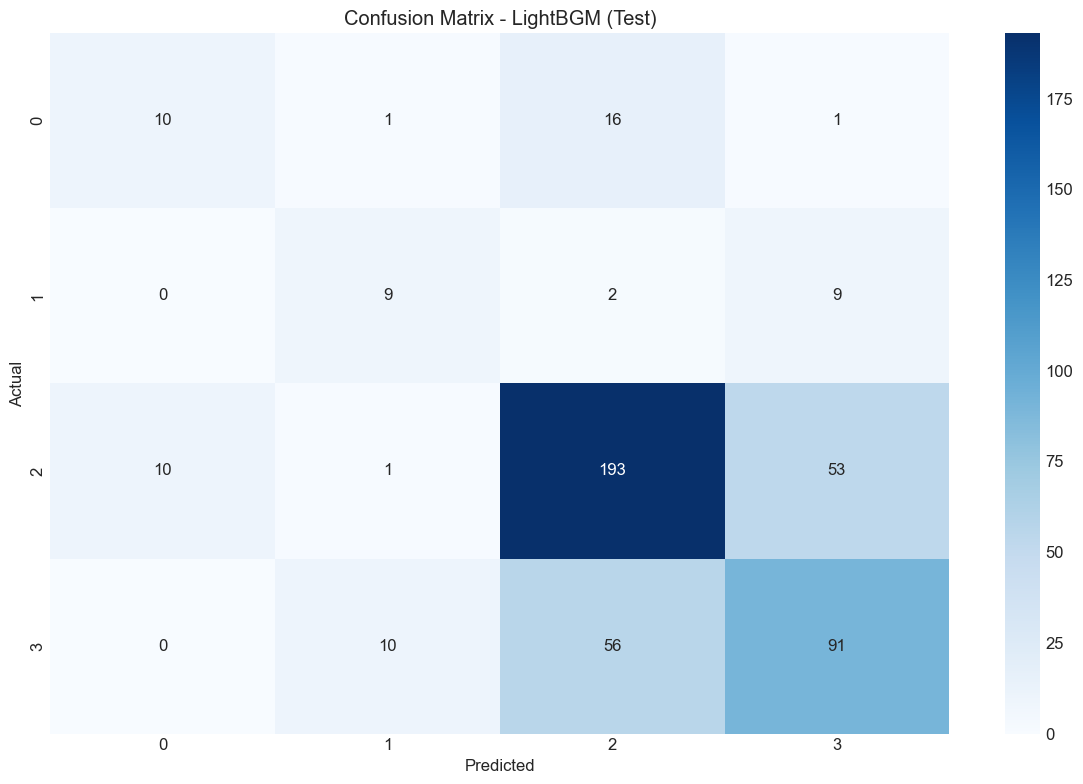

ROC AUC (weighted, OVR) - LightBGM: 0.7834


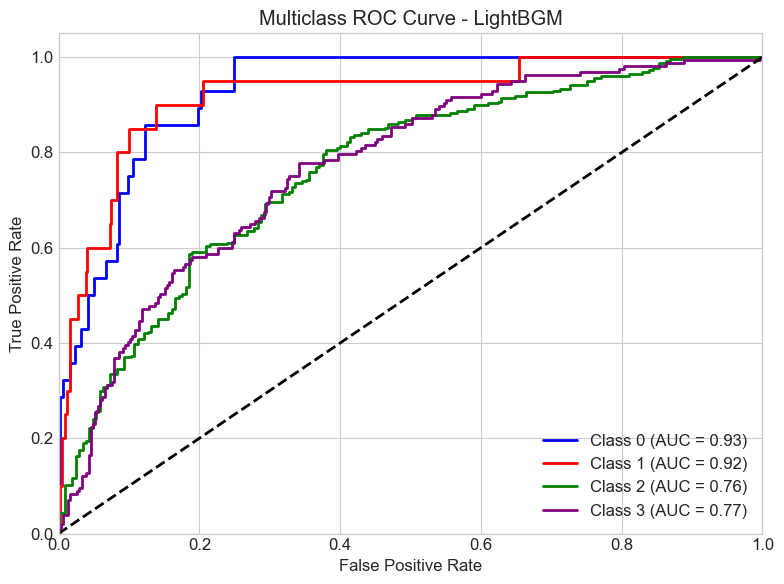

mean_pm10: 290
std_pm10: 294
min_pm10: 292
max_pm10: 243
median_pm10: 266
range_pm10: 219
last_pm10: 539
slope_pm10: 383
mean_so2: 244
std_so2: 262
min_so2: 217
max_so2: 223
median_so2: 272
range_so2: 242
last_so2: 239
slope_so2: 443
mean_co: 272
std_co: 308
min_co: 256
max_co: 206
median_co: 289
range_co: 173
last_co: 341
slope_co: 411
mean_o3: 276
std_o3: 289
min_o3: 317
max_o3: 236
median_o3: 254
range_o3: 211
last_o3: 623
slope_o3: 411
mean_no2: 236
std_no2: 274
min_no2: 272
max_no2: 186
median_no2: 286
range_no2: 278
last_no2: 506
slope_no2: 421


In [50]:
from itertools import cycle
test_scores = {}

def evaluate_model(model, X_test, y_test, model_name):
    
    y_test_pred = model.predict(X_test)
    
    print("=== TEST SET METRICS ===")
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    precision = precision_score(y_test, y_test_pred, average='weighted')
    
    test_scores[model_name] = {
        'accuracy': accuracy,
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(classification_report(y_test, y_test_pred))
    
    
    cm_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y), 
                yticklabels=np.unique(y),
                )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name} (Test)')
    
    plt.tight_layout()
    plt.show()

    if hasattr(model, "predict_proba"):
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        y_proba = model.predict_proba(X_test)
        n_classes = y_test_bin.shape[1]

        # ROC AUC score
        try:
            roc_auc = roc_auc_score(y_test_bin, y_proba, average='weighted', multi_class='ovr')
            print(f"ROC AUC (weighted, OVR) - {model_name}: {roc_auc:.4f}")
        except Exception as e:
            print(f"Error menghitung ROC AUC untuk {model_name}: {e}")

        # ROC Curve Plot
        fpr = dict()
        tpr = dict()
        roc_auc_vals = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc_vals[i] = auc(fpr[i], tpr[i])

        colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown'])

        plt.figure(figsize=(8, 6))
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f"Class {i} (AUC = {roc_auc_vals[i]:.2f})")

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Multiclass ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


        importances = model.feature_importances_
        feature_names = x.columns.tolist()
        for name, imp in zip(feature_names, importances):
                print(f"{name}: {imp}")

        # Bisa juga visualisasi
        # model.plot_importance(model, max_num_features=10)
        # plt.show()


    else:
        print(f"Model {model_name} tidak support predict_proba, ROC Curve tidak dapat ditampilkan.")

    
    
for i, model in models.items():
    if i == "LightBGM": 
        evaluate_model(model, X_test, y_test, i)

In [85]:
with open("models/weather_date_model2.pkl", 'wb') as file:
    pickle.dump(models["LightBGM"], file)

# Model Parameter

Testing a different modeling approach using direct pollutant measurements instead of time features:
- Using current pollutant levels as features

In [52]:
X = df[['pm10', 'so2', 'co', 'o3', 'no2', 'max', 'critical_PM10', 'critical_SO2', 'critical_CO', 'critical_O3', 'critical_NO2']]
y = df['categori'] 

Split Data Set

In [53]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

In [54]:
scaler2 = StandardScaler()
X_train = scaler2.fit_transform(X_train)
X_val = scaler2.transform(X_val)
X_test = scaler2.transform(X_test)

with open("models/weather_parameter_scaler.pkl", 'wb') as file:
    pickle.dump(scaler2, file)

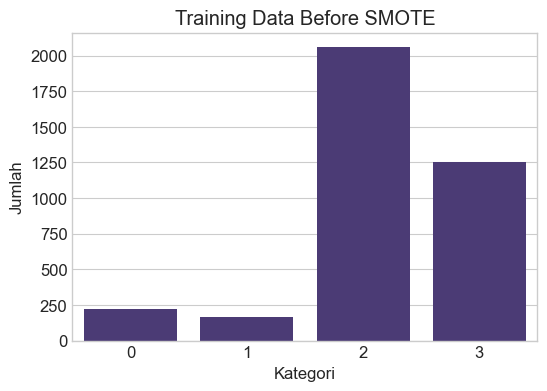

In [55]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Training Data Before SMOTE')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

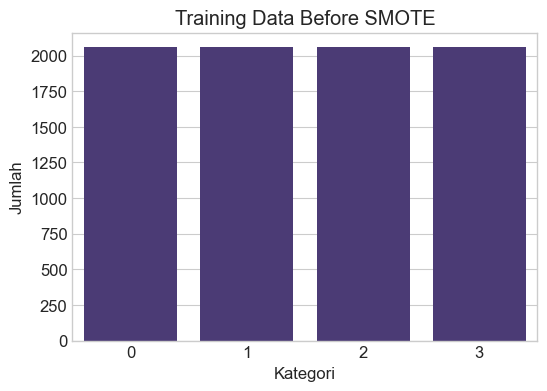

In [58]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Training Data Before SMOTE')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [59]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softmax', num_class=4, random_state=42),
    "LightBGM": LGBMClassifier(objective='multiclass',num_class=4,random_state=42),
}

### Multi-Algorithm Model Selection Strategy

Comprehensive ensemble of state-of-the-art machine learning algorithms optimized for multi-class air quality prediction:

#### Algorithm:

| Algorithm | Category | Strengths | Air Quality Advantages |
|-----------|----------|-----------|----------------------|
| **Random Forest** | Ensemble (Bagging) | Robust, interpretable, handles mixed data | Feature importance, outlier resistance |
| **XGBoost** | Ensemble (Boosting) | Superior performance, handles imbalance | Advanced regularization, missing value handling |
| **LightGBM** | Ensemble (Boosting) | Fast, memory efficient | Large dataset scalability, categorical features |


CV

In [60]:
for name, model in models.items():
    print(name)
    perform_cross_validation(model,X_train,y_train)
    print("==================================")

Random Forest
Cross-validation scores (5-fold): [1. 1. 1. 1. 1.]
Mean CV score: 1.0000, Std: 0.0000
XGBoost
Cross-validation scores (5-fold): [1.         0.99817848 1.         1.         1.        ]
Mean CV score: 0.9996, Std: 0.0007
LightBGM
Cross-validation scores (5-fold): [1.         0.99635405 0.99452907 0.99939283 1.        ]
Mean CV score: 0.9981, Std: 0.0022


Based on CV, Random Forest give a perfect Mean CV Score and Std.

In [61]:

val_scores = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]
    acc = accuracy_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred, average='weighted')
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    prec = precision_score(y_val, y_val_pred, average='weighted')

    val_scores[name] = [acc, rec, f1, prec]
    
    print(f"Validation Accuracy ({name}): {acc:.4f}")
    print(f"Validation Recall ({name}): {rec:.4f}")
    print(f"Validation F1 ({name}): {f1:.4f}")
    print(f"Validation Precision ({name}): {prec:.4f}")
    print(classification_report(y_val, y_val_pred))




Training Random Forest...
Validation Accuracy (Random Forest): 1.0000
Validation Recall (Random Forest): 1.0000
Validation F1 (Random Forest): 1.0000
Validation Precision (Random Forest): 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00       257
           3       1.00      1.00      1.00       157

    accuracy                           1.00       462
   macro avg       1.00      1.00      1.00       462
weighted avg       1.00      1.00      1.00       462


Training XGBoost...
Validation Accuracy (XGBoost): 0.9957
Validation Recall (XGBoost): 0.9957
Validation F1 (XGBoost): 0.9957
Validation Precision (XGBoost): 0.9957
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      0.95      0.95        20
           2       1.00      1.00      1

In [62]:
metric_name = ["Accuracy", "Recall", "F1_Score", "Precision"]

df_val_score = pd.DataFrame(val_scores, index=metric_name).T

print(df_val_score)

               Accuracy    Recall  F1_Score  Precision
Random Forest  1.000000  1.000000  1.000000   1.000000
XGBoost        0.995671  0.995671  0.995671   0.995671
LightBGM       0.989177  0.989177  0.989171   0.989175


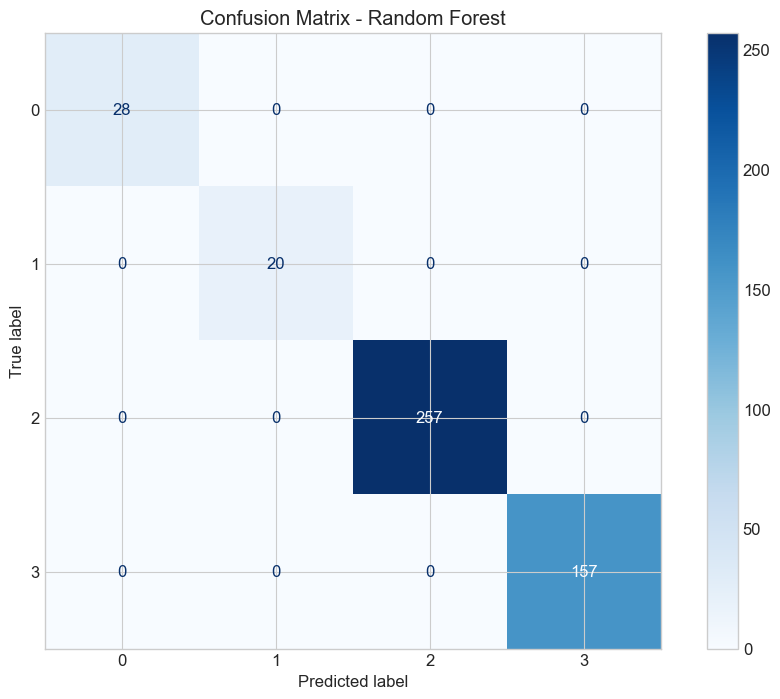

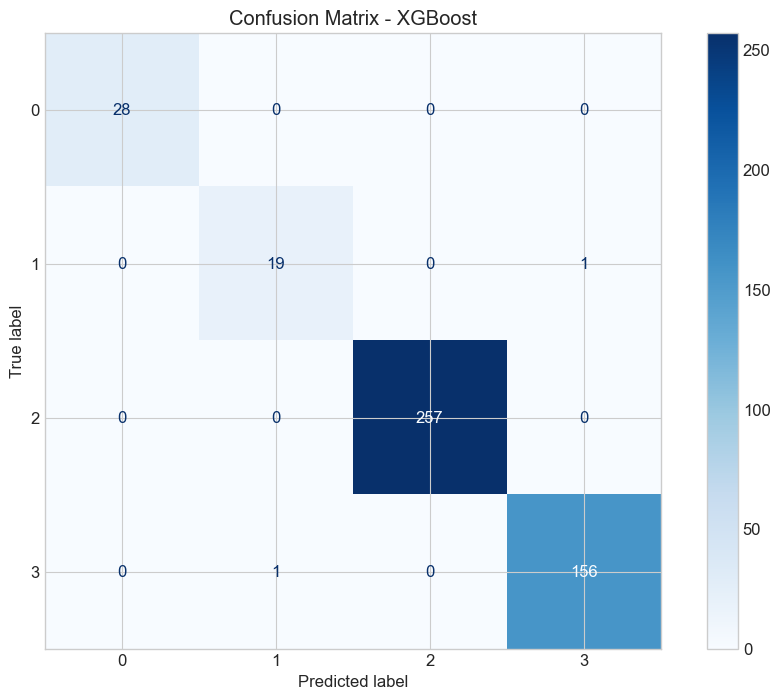

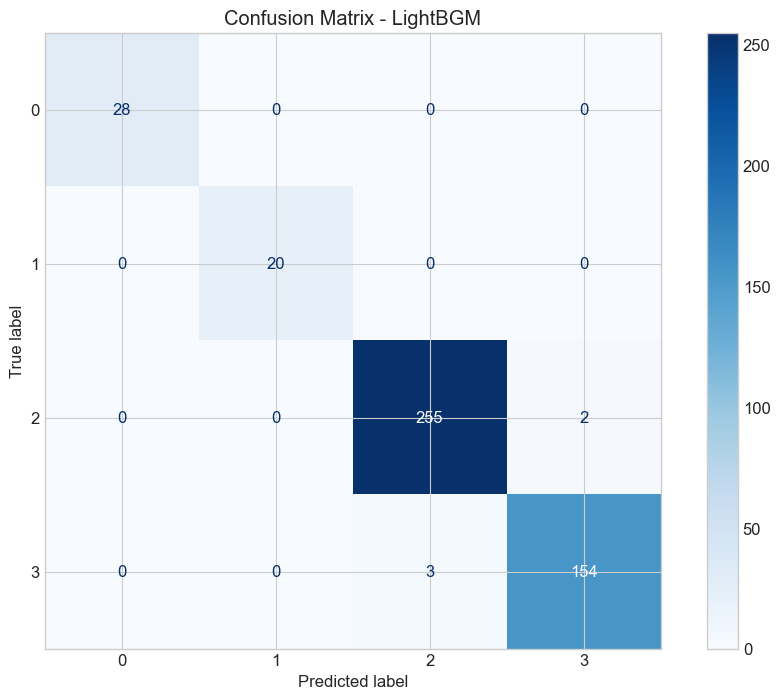

In [63]:
for name, model in models.items():
    y_val_pred = model.predict(X_val)

    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


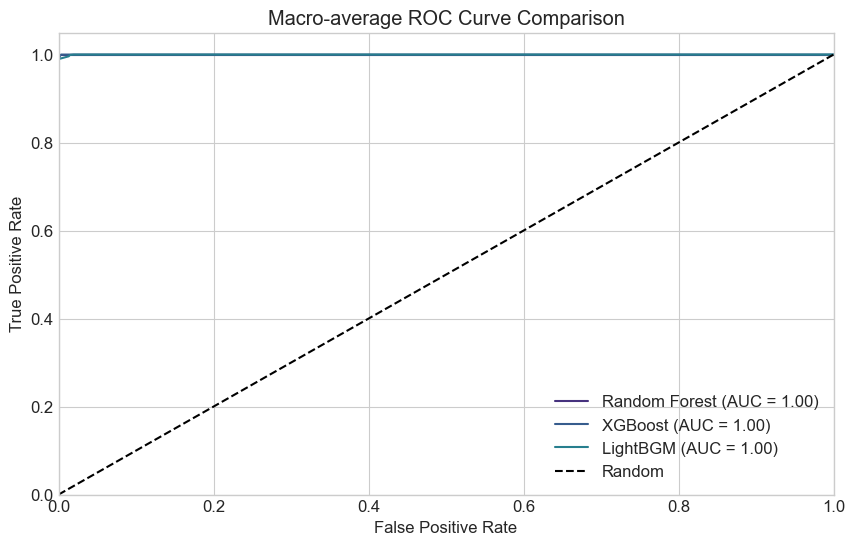

In [64]:

y_train = pd.Series(y_train)
classes = sorted(y_train.unique()) 
y_val_bin = label_binarize(y_val, classes=classes)
n_classes = len(classes)

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_score = model.predict_proba(X_val)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, label=f"{name} (AUC = {macro_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-average ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


| Model         | Accuracy | Recall  | F1_Score | Precision |
|---------------|----------|---------|----------|-----------|
| Random Forest | 1.000000 | 1.000000| 1.000000 | 1.000000  |
| XGBoost       | 0.995671 | 0.995671| 0.995671 | 0.995671  |
| LightGBM      | 0.989177 | 0.989177| 0.989171 | 0.989175  |

We will use Random Forest Algorithm for this model because it gain a perfect score.

But, since the Random Forest model achieves perfect evaluation metrics, further tuning is not essential. However, for academic purposes, we will proceed with tuning nonetheless.

In [65]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    rf,
    param_grid=param_dist,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best params: {grid_search.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [66]:
models_tuned = {
    'Random Forest Tuned': grid_search.best_estimator_
}

val_scores = {}

for name, model in models_tuned.items():
    print(f"\nEvaluating {name}...")
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]
    acc = accuracy_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred, average='weighted')
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    prec = precision_score(y_val, y_val_pred, average='weighted')

    val_scores[name] = [acc, rec, f1, prec]
    
    print(f"Validation Accuracy ({name}): {acc:.4f}")
    print(f"Validation Recall ({name}): {rec:.4f}")
    print(f"Validation F1 ({name}): {f1:.4f}")
    print(f"Validation Precision ({name}): {prec:.4f}")
    print(classification_report(y_val, y_val_pred))


Evaluating Random Forest Tuned...
Validation Accuracy (Random Forest Tuned): 1.0000
Validation Recall (Random Forest Tuned): 1.0000
Validation F1 (Random Forest Tuned): 1.0000
Validation Precision (Random Forest Tuned): 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00       257
           3       1.00      1.00      1.00       157

    accuracy                           1.00       462
   macro avg       1.00      1.00      1.00       462
weighted avg       1.00      1.00      1.00       462



In [67]:
print("TUNED")
metric_name = ["Accuracy", "Recall", "F1_Score", "Precision"]

df_val_score = pd.DataFrame(val_scores, index=metric_name).T

print(df_val_score)

TUNED
                     Accuracy  Recall  F1_Score  Precision
Random Forest Tuned       1.0     1.0       1.0        1.0


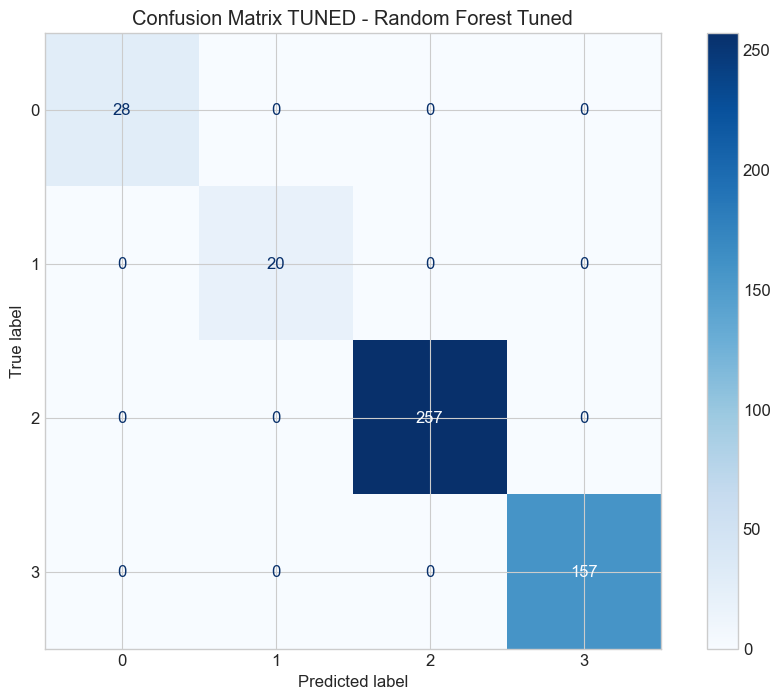

In [68]:
for name, model in models_tuned.items():
    y_val_pred = model.predict(X_val)

    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix TUNED - {name}")
    plt.show()

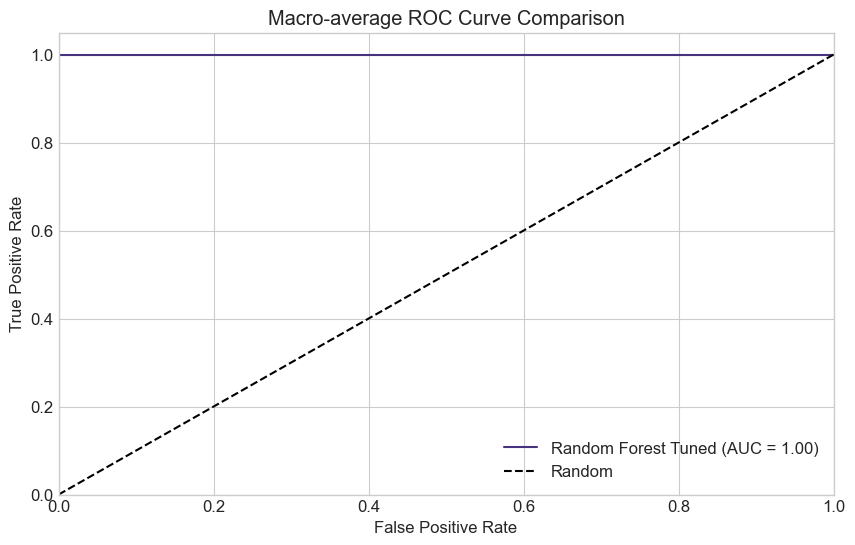

In [69]:

y_train = pd.Series(y_train)
classes = sorted(y_train.unique()) 
y_val_bin = label_binarize(y_val, classes=classes)
n_classes = len(classes)

plt.figure(figsize=(10, 6))

for name, model in models_tuned.items():
    y_score = model.predict_proba(X_val)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, label=f"{name} (AUC = {macro_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-average ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Testing Set

=== TEST SET METRICS ===
Accuracy: 1.0000
F1 Score: 1.0000
Recall: 1.0000
Precision: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00       258
           3       1.00      1.00      1.00       157

    accuracy                           1.00       463
   macro avg       1.00      1.00      1.00       463
weighted avg       1.00      1.00      1.00       463



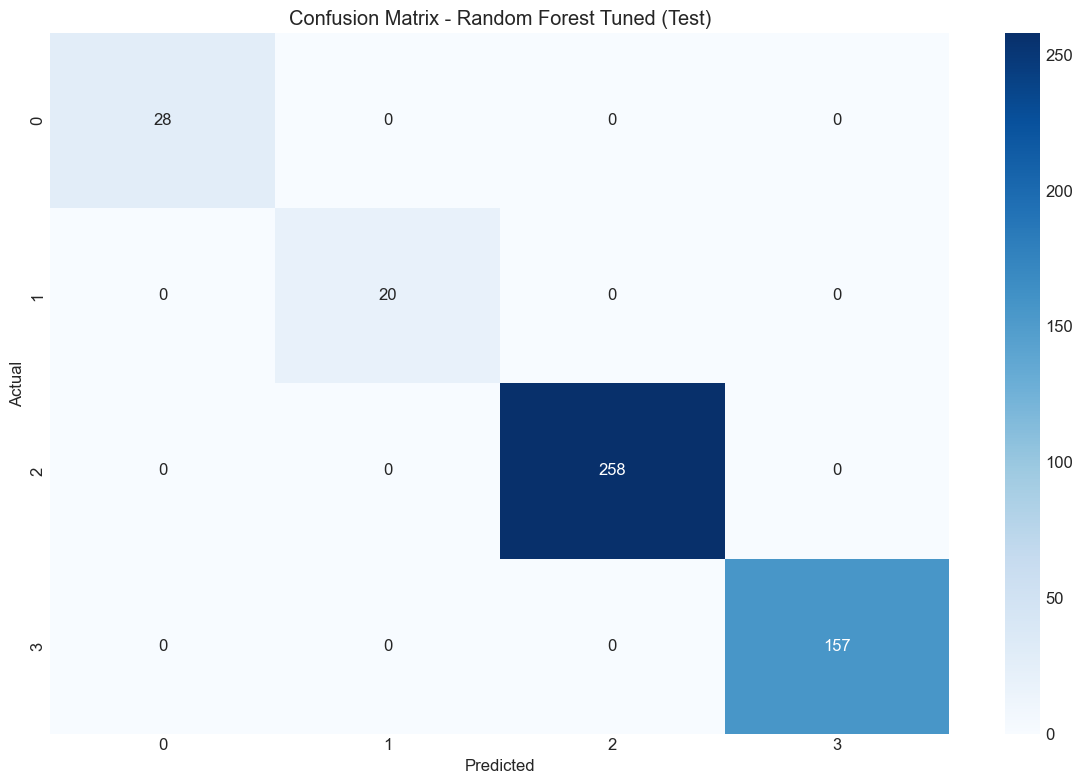

ROC AUC (weighted, OVR) - Random Forest Tuned: 1.0000


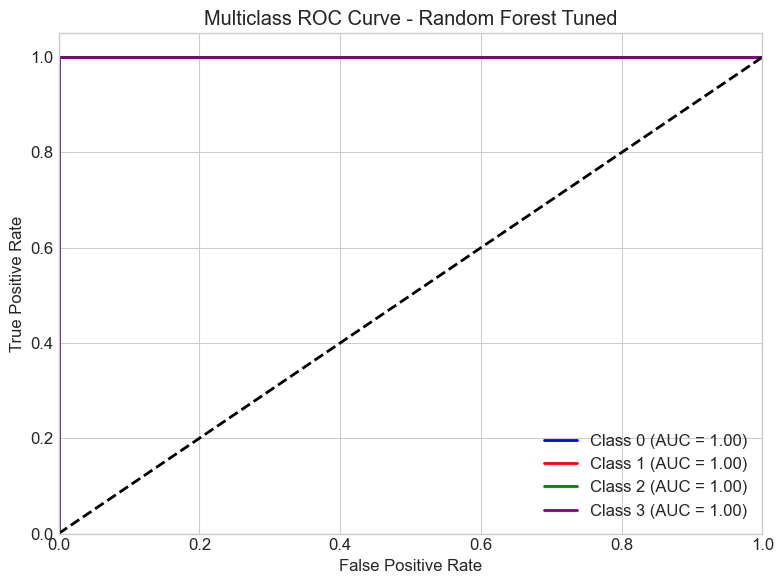

pm10: 0.0
so2: 0.0
co: 0.0
o3: 0.0
no2: 0.0
max: 1.0
critical_PM10: 0.0
critical_SO2: 0.0
critical_CO: 0.0
critical_O3: 0.0
critical_NO2: 0.0


In [70]:
from itertools import cycle
test_scores = {}

def evaluate_model(model, X_test, y_test, model_name):
    
    y_test_pred = model.predict(X_test)
    
    print("=== TEST SET METRICS ===")
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    precision = precision_score(y_test, y_test_pred, average='weighted')
    
    test_scores[model_name] = {
        'accuracy': accuracy,
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(classification_report(y_test, y_test_pred))
    
    
    cm_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y), 
                yticklabels=np.unique(y),
                )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name} (Test)')
    
    plt.tight_layout()
    plt.show()

    if hasattr(model, "predict_proba"):
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        y_proba = model.predict_proba(X_test)
        n_classes = y_test_bin.shape[1]

        # ROC AUC score
        try:
            roc_auc = roc_auc_score(y_test_bin, y_proba, average='weighted', multi_class='ovr')
            print(f"ROC AUC (weighted, OVR) - {model_name}: {roc_auc:.4f}")
        except Exception as e:
            print(f"Error menghitung ROC AUC untuk {model_name}: {e}")

        # ROC Curve Plot
        fpr = dict()
        tpr = dict()
        roc_auc_vals = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc_vals[i] = auc(fpr[i], tpr[i])

        colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown'])

        plt.figure(figsize=(8, 6))
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f"Class {i} (AUC = {roc_auc_vals[i]:.2f})")

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Multiclass ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        importances = model.feature_importances_
        feature_names = X.columns.tolist()
        for name, imp in zip(feature_names, importances):
                print(f"{name}: {imp}")

    else:
        print(f"Model {model_name} tidak support predict_proba, ROC Curve tidak dapat ditampilkan.")

    
    
for i, model in models_tuned.items():
    if i == "Random Forest Tuned": 
        evaluate_model(model, X_test, y_test, i)

The exceptionally high performance of our model, including 100% F1-score, is largely due to certain features like critical_O3, max, and o3 that clearly differentiate the classes. For example, critical_O3 is almost exclusively high in one category, and max and o3 show extreme value differences across classes. These strong, almost “leakage”-like indicators make the classification task very easy, so the model achieves perfect scores without actually overfitting. In other words, the dataset’s features make the classes trivially separable, explaining the flawless results.

In [71]:
for col in X.columns:
    print(col)
    print(X[col].groupby(y).mean())
    print()

pm10
categori
0    37.660714
1    75.019802
2    61.623543
3    74.267219
Name: pm10, dtype: float64

so2
categori
0    18.542857
1    24.099010
2    28.520979
3    29.864158
Name: so2, dtype: float64

co
categori
0    26.482143
1    37.915842
2    30.134033
3    30.133291
Name: co, dtype: float64

o3
categori
0     35.525000
1    222.985149
2     65.265346
3    112.966837
Name: o3, dtype: float64

no2
categori
0    11.514286
1    19.495050
2    17.690365
3    19.823980
Name: no2, dtype: float64

max
categori
0     42.625000
1    226.326733
2     76.598291
3    130.639031
Name: max, dtype: float64

critical_PM10
categori
0    0.482143
1    0.000000
2    0.276612
3    0.066327
Name: critical_PM10, dtype: float64

critical_SO2
categori
0    0.053571
1    0.000000
2    0.019425
3    0.000000
Name: critical_SO2, dtype: float64

critical_CO
categori
0    0.039286
1    0.000000
2    0.014375
3    0.000638
Name: critical_CO, dtype: float64

critical_O3
categori
0    0.403571
1    0.985149
2  

Model Saved

In [72]:
import pickle
with open('models/weather_parameter_model.pkl', 'wb') as f:
    pickle.dump(models_tuned["Random Forest Tuned"], f)

#